# Resolução do item 2.3 por simulated annealing

## Breve Intrudução:

*Simulated Annealing* é um algoritmo de otimização que consiste em uma busca local probabilística e, portanto, devido à aleatoriedade desse processo, é classificado como estocástico. 

O processo é fundamentado numa analogia com a termodinâmica, uma vez que o termo *annealing* é proveniente da metalurgia e corresponde à prática de aquecer o metal a elevadas temperaturas muito rapidamente a fim de, em seguida, resfriá-lo lentamente.

Ademais, assim como o algoritmo estocástico *hill climbing*, o *simulated annealing* substitui uma solução atual por uma solução próxima, isto é, contida em sua vizinhança. Caso a solução próxima seja melhor do que a atual, esta última é substituída pela primeira. Porém, diferentemente do algoritmo *hill climbing*, a meta-heurística em questão permite que uma solução pior seja aceita em determinados casos, o que depende da variável temperatura e do quão pior a solução próxima é com relação à atual.

Da mesma maneira que o procedimento metalúrgico, a temperatura deve ser reduzida à medida que o processo de busca progride, de tal forma que soluções ruins são mais prováveis de serem obtidas no início, enquanto que, no final do processo, o decréscimo na temperatura leva o algoritmo a convergir para uma solução ótima, necessariamente local.

Importante ressaltar que o procedimento deve ser realizado diversas vezes, pois dependendo da posição de partida (solução inicial) máximos locais podem ser atingidos ao invés de um máximo global, visto que o algoritmo analisa sempre uma vizinhança da solução atual.

Logo abaixo segue a função objetivo a ser maximizada.

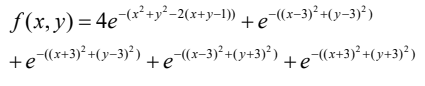

## Implementação:

Primeiramente, importar as bibliotecas necessárias e definir a função objetivo, isto é, aquela que será maximizada.

In [1]:
import math
import numpy as np
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Definindo a função objetivo
def objetivo (x, y):
    #Recebe: x e y
    #Retorna: função matemática abaixo
  
    return 4*math.exp(-(x**2 + y**2 - 2*(x+y-1))) + math.exp(-((x-3)**2 + (y-3)**2)) + math.exp(-((x+3)**2 + (y-3)**2)) +math.exp(-((x-3)**2 + (y+3)**2)) +math.exp(-((x+3)**2 + (y+3)**2))

Em seguida, visto que a função objetivo trata-se de uma superfície, a vizinhança da solução atual foi definida como um círculo de raio **p** centrado nos pontos (x, y) da solução em questão, em que **p** é o parâmetro **passo** do algoritmo.

Dessa forma, para analisar se existe uma solução melhor nessa vizinhança, foram considerados 8 pontos que distam **p** de (x,y) e, portanto, localizados na borda do círculo, respectivamente nas direções Norte, Nordeste, Leste, Sudeste, Sul, Sudoeste, Oeste e Noroeste.

Considerando **delta** como a diferença entre os valores das soluções próxima e atual, foi implementado um dicionário **dic** a fim de associar os valores desses deltas com os pontos de vizinhança analisados.

Caso a solução vizinha possua um valor maior do que a atual, esta é substituída pela primeira.

No entanto, conforme discutido na seção Breve Introdução, existe uma probabalidade de uma solução pior em performance ser aceita em detrimento da atual. Esta probabilidade é definida como *metropolis acceptance criteria* (**map**).

Tudo isso foi implementado na função **radial_sim_anneal** abaixo.

In [2]:
# Declaração da função radial_sim_anneal:
def radial_sim_anneal(pod_init, p, i, temp):
#     Recebe: posição inicial -> tupla (x, y) 
#             tamanho dos passos radiais = float p
#             função objetivo
#             8 vizinhos próximos na redondeza da posição inicial

#     Retorna: tupla com uma tupla dos pares da maior diferença de valor em relação à posição inicial e uma flag 
#              'maximo' que aponta se chegou a uma solução máxima possível ou não
  
      
      # Atribui as coordenadas às variáveis x0 e y0
      best_x = pod_init[0]
      best_y = pod_init[1]
      best_val = objetivo(best_x, best_y)

      ax0, ay0, a_val = best_x, best_y, best_val

      maximo = False

      # Foi criado um dicionário para associar os diferentes deltas a cada coordenada da redondeza.
      # Foram colocados os deltas como keys e as coordenadas como values para facilitar.
      # Assim, pelo máximo valor da key (delta máximo) é possível obter sua posição
      # em coordenadas (x, y)
      
      dic = {}
      
      # Vizinhança é um círculo de raio p e centro em (ax0,ay0)
      # sendo (ax0, ay0) a posição atual sendo analisada
      # O vizinhos estão contidos nessa circunferência e foram analisadas 8 direçoes possíveis

      # Vizinho 1: Norte
      dic[objetivo(ax0, ay0+p) - objetivo(ax0, ay0)] = (ax0, ay0+p)
      # Vizinho 2: Nordeste
      dic[objetivo(ax0 + p/(2**(0.5)), ay0 + p/(2**(0.5))) - objetivo(ax0, ay0)] = (ax0 + p/(2**(0.5)), ay0 + p/(2**(0.5)))
      # Vizinho 3: Leste
      dic[objetivo(ax0 + p, ay0) - objetivo(ax0, ay0) ] = (ax0 + p, ay0)
      # Vizinho 4: Sudeste
      dic[objetivo(ax0 + p/(2**(0.5)), ay0 - p/(2**(0.5))) - objetivo(ax0, ay0)] = (ax0 + p/(2**(0.5)), ay0 - p/(2**(0.5)))
      # Vizinho 5: Sul
      dic[objetivo(ax0 , ay0-p) - objetivo(ax0, ay0)] = (ax0 , ay0-p)
      # Vizinho 6: Sudoeste
      dic[objetivo(ax0 - p/(2**(0.5)), ay0 - p/(2**(0.5))) - objetivo(ax0, ay0)] = (ax0 - p/(2**(0.5)), ay0 - p/(2**(0.5)))
      # Vizinho 7: Oeste
      dic[objetivo(ax0 - p, ay0) - objetivo(ax0, ay0)] = (ax0 - p, ay0)
      # Vizinho 8: Noroeste
      dic[objetivo(ax0 - p/(2**(0.5)), ay0 + p/(2**(0.5))) - objetivo(ax0, ay0)] = (ax0 - p/(2**(0.5)), ay0 + p/(2**(0.5)))

      # Na etapa de otimização no intuito de obter o valor máximo, busca-se um ponto cujo
      # delta entre (posição vizinha) - (posição atual) seja o maior possível
      # Caso não haja nenhum delta positivo, o ponto atual é ótimo.
          
      delta = max(dic.keys())
      # calcular a temperatura para cada iteração
      # A temperatura diminuirá a medida que processo avança
      # utilizou-se (i+1) a fim de evitar divisões por zero
      t = temp/ float(i + 1)
      # calcular a metropolis acceptance criterion (mac)
      # Probalidade de uma solução não-ótima ser aceita como resultado
      # Diminui a medida que o processo avança
      mac = exp(-delta / t)

      if(delta > 0 ):
          #novo ponto de máximo
          best = dic[delta]
          best_val = objetivo(dic[delta][0], dic[delta][1])
          return (best, best_val , maximo)
      elif(delta <= 0 and rand() < mac):
          maximo = True
          return((ax0,ay0), objetivo(ax0,ay0), maximo)
      else:
          #ponto atual é candidato a MÁXIMO GLOBAl
          maximo = True
          return((ax0,ay0), objetivo(ax0,ay0), maximo)

Por fim, testar o código para diferentes pontos iniciais. Esse passo é importante para encontrar o máximo global, visto que a solução ótima é necessariamente local apenas, não global. Isso ocorre devido ao fato de que, no momento da otimização, são levados em consideração apenas pontos nos arredores da solução atual.

Dessa forma, o algoritmo foi testado para 81 pontos iniciais.

In [3]:
#Lista com as tuplas (x,y) a serem testadas
teste = []
for j in range(-4,5,1):
  for k in range(-4,5,1):
    teste.append((j,k))

# Definindo parâmetros iniciais
passo = 0.01                     #take a step
rodadas = list(range(1000))      #número de iterações
temp = 10                        #temperatura
possivel_max_global = 0.0        #valor do máximo global
possiveis_max = []               #lista com todos os pontos de máximo local obtidos

for i in teste:
  pod_init = i
  print('Valor inicial: ', pod_init)

  # Executar o processo 'r' vezes consecutivas perseguindo o objetivo de otimização
  for r in rodadas:
      pod_init, score, maximo = radial_sim_anneal(pod_init, passo, r, temp)
      if(maximo):
        print('Done!')
        print('Ponto de máximo: ',pod_init)
        print('Valor máximo: %.5f' % score)
        print("\n")  
        break
  if (score > possivel_max_global):
    possivel_max_global = score
    possiveis_max.append(pod_init)
print("Máximo global: %.5f" % possivel_max_global)
print("Ponto de máximo global: ",possiveis_max.pop())

Valor inicial:  (-4, -4)
Done!
Ponto de máximo:  (-3.002979438526995, -3.002979438526995)
Valor máximo: 0.99998


Valor inicial:  (-4, -3)
Done!
Ponto de máximo:  (-3.0000000000000213, -3)
Valor máximo: 1.00000


Valor inicial:  (-4, -2)
Done!
Ponto de máximo:  (-3.002979438526995, -2.997020561473005)
Valor máximo: 0.99998


Valor inicial:  (-4, -1)
Done!
Ponto de máximo:  (-3.002979438526995, -2.997020561473011)
Valor máximo: 0.99998


Valor inicial:  (-4, 0)
Done!
Ponto de máximo:  (-3.001507575950847, 2.9984924240491546)
Valor máximo: 1.00000


Valor inicial:  (-4, 1)
Done!
Ponto de máximo:  (-3.002979438526995, 2.997020561473011)
Valor máximo: 0.99998


Valor inicial:  (-4, 2)
Done!
Ponto de máximo:  (-3.002979438526995, 2.997020561473005)
Valor máximo: 0.99998


Valor inicial:  (-4, 3)
Done!
Ponto de máximo:  (-3.0000000000000213, 3)
Valor máximo: 1.00000


Valor inicial:  (-4, 4)
Done!
Ponto de máximo:  (-3.002979438526995, 3.002979438526995)
Valor máximo: 0.99998


Valor inicial

## Resultados:

Dos 81 casos testados, foram obtidos 4 máximos locais e um máximo global.

*  Primeiro máximo local obtido: **(-3,-3)**



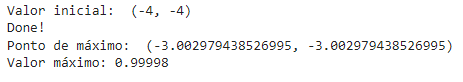
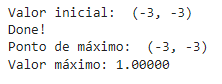

*   Segundo máximo local obtido: **(-3, 3)**




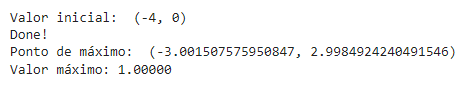
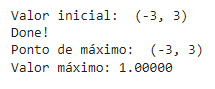

*   Terceiro máximo local obtido: **(3, -3)**



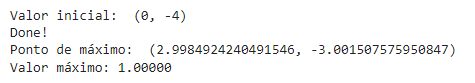
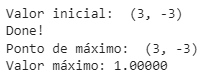

*   Quarto máximo local obtido: **(3, 3)**





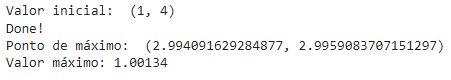
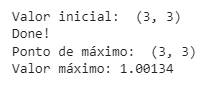

*   Ponto de Máximo Global: **(1, 1)**



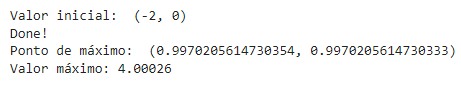
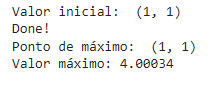

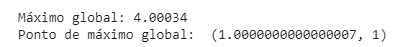

Nota-se que os resultados estão de acordo com o gráfico da função objetivo, conforme evidenciado na próxima seção.

##Gráficos: plot da funçao objetivo

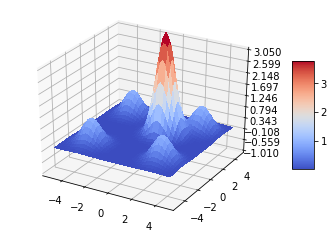

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
R1 = np.exp(-(X**2 + Y**2 - 2*(X+Y-1)))
R2 = np.exp(-((X-3)**2 + (Y-3)**2))
R3 = np.exp(-((X+3)**2 + (Y-3)**2))
R4 = np.exp(-((X-3)**2 + (Y+3)**2))
R5 = np.exp(-((X+3)**2 + (Y+3)**2))
Z = 4*R1 + R2 + R3 + R4 + R5

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 3.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

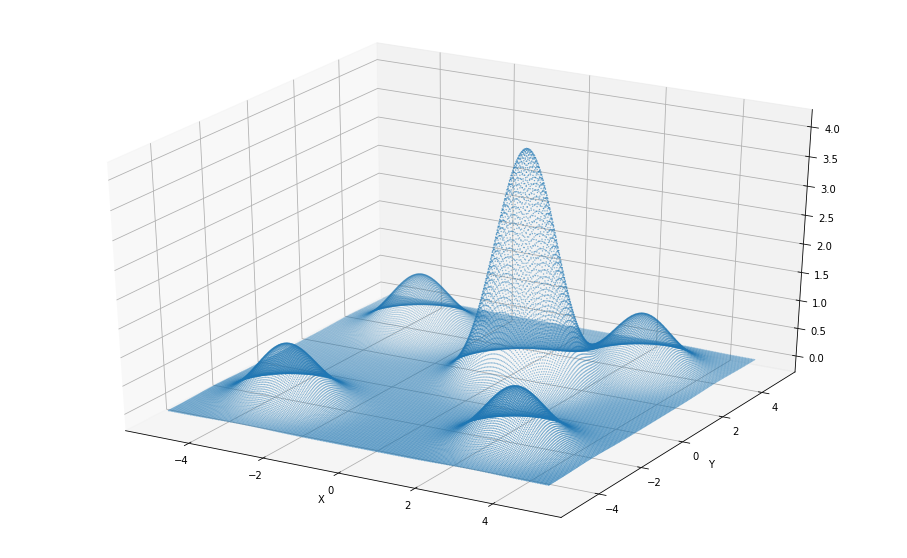

In [6]:
fig = plt.figure('3D surface', figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5,5, 250)
y = np.linspace(-5,5, 250)

coordsX = []
coordsY = []
for i in x:
    for j in y:
        coordsX.append(i)
        coordsY.append(j)

r = np.array([objetivo(coordsX[i], coordsY[i]) for i in range(len(coordsX))])

ax.scatter(coordsX, coordsY, r, s=0.1)
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Referências bibliográficas:

https://pt.wikipedia.org/wiki/Simulated_annealing

https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
